<center><h2 style="color:#B01E68">Implementing a Multiple Linear Regression Model</h2></center>

Stepping up my linear regression by leting the model accept more features. In this Jupyter Notebook I tried to use vectorization as much as possible!

<center><h3 style="color:#DC3535">1. Loading Python Modules and Training Data

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=2)
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
#Columns: Sepal length[cm], Sepal width[cm], Petal length[cm], Petal width[cm], Iris species
data = np.genfromtxt('iris.data', delimiter=',', dtype=object)

In [3]:
#Target - Petal length [cm]
y_train = data[:, 2].astype(float)

x_features = ['Petal width [cm]', 'Sepal length [cm]', 'Sepal width [cm]']
x_train = np.c_[data[:,3], data[:,:2]].astype(float)

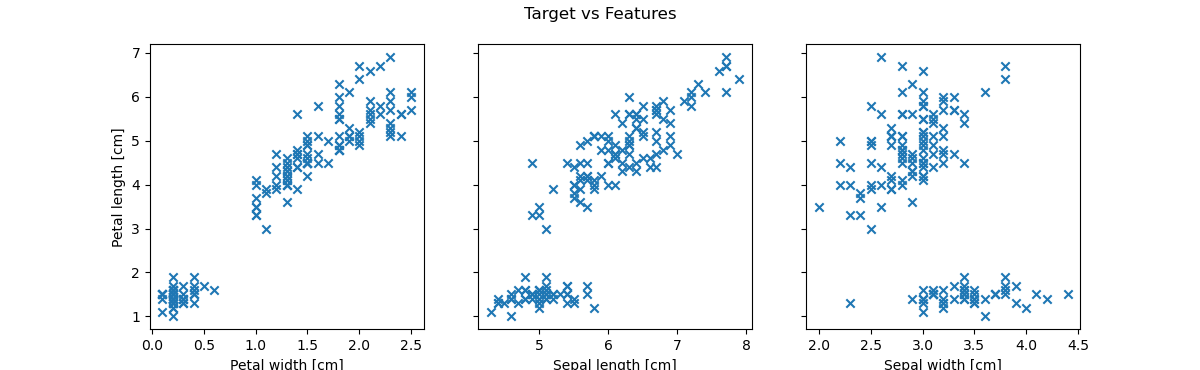

In [4]:
fig1, ax = plt.subplots(1, 3, figsize=(12, 3.7), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, marker = 'x')
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel('Petal length [cm]')
fig1.suptitle('Target vs Features')
plt.show()

<center><h3 style="color:#DC3535">2. Z-score normalization </h3></center>

Normalizing training data means we can use far greater learning rates in our gradient descent algorithm and speed up the regression as will be shown below.

In [5]:
print(f'Range of values of each raw feature: {np.ptp(x_train,axis=0)}')
print(f'Mean of raw features: {np.mean(x_train, axis=0)}')
print(f'Standard deviation of raw features: {np.std(x_train, axis=0)}')

Range of values of each raw feature: [2.4 3.6 2.4]
Mean of raw features: [1.2  5.84 3.05]
Standard deviation of raw features: [0.76 0.83 0.43]


In [6]:
#Defining my z-score normalization function

def zscore_norm(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_norm = (x - mean) / std
    return x_norm, mean, std

In [7]:
#Running the normalization on x_train
x_norm, norm_mean, norm_std = zscore_norm(x_train)

print(f'Range of values of each normalized feature: {np.ptp(x_norm,axis=0)}') 
print(f'Mean of normalized features: {np.mean(x_norm, axis=0)}')
print(f'Standard deviation of normalized features: {np.std(x_norm, axis=0)}')

Range of values of each normalized feature: [3.16 4.36 5.55]
Mean of normalized features: [-0. -0. -0.]
Standard deviation of normalized features: [1. 1. 1.]


<center><h3 style="color:#DC3535">3. Cost function

In [8]:
compute_cost = lambda x,y,w,b : np.sum((np.dot(x, w) + b - y)**2) / (2 * x.shape[0])

<center><h3 style="color:#DC3535">4. Gradient

In [9]:
def gradient(x_train, y_train, w, b): 
    error = np.dot(x_train, w) + b - y_train
    deriv_w = np.sum(error[:, np.newaxis] * x_train, 0) / x_train.shape[0]
    deriv_b = np.sum(error) / x_train.shape[0]                         
        
    return deriv_w, deriv_b

<center><h3 style="color:#DC3535">5. Gradient descent

In [10]:
def g_desc(x, y, w_strt, b_strt, alpha, max_iter=1000):
    w, b, cost_hist = w_strt, b_strt, []
    
    for i in range(max_iter):
        d_w, d_b = gradient(x, y, w, b)
        w -= alpha * d_w
        b -= alpha * d_b
        
        cost_hist.append(compute_cost(x,y,w,b))
        
        if i%100 == 0:
            print(f'Iteration: {i:>4}, cost: {round(cost_hist[-1], 4):>7}')
    
    return w, b, cost_hist

<center><h4 style="color:#F49D1A">5.1 Gradient descent with normalized training data </h4></center>

Using the normalized training data and a learning rate $\alpha = 1$ we were able to reach the minimum of the cost function within 200 iterations.

Iteration:    0, cost:  1.3579
Iteration:  100, cost:  0.0492


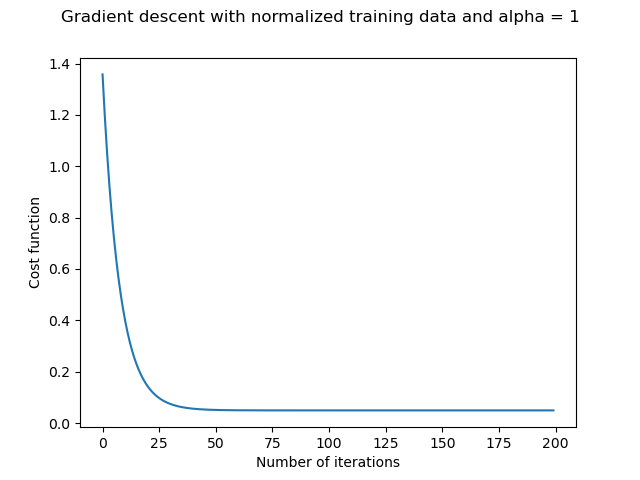

In [11]:
w_optimal, b_optimal, cost_hist = g_desc(x_norm, y_train, np.zeros(3), 0, 1, 200)

fig2, ax = plt.subplots()
fig2.suptitle('Gradient descent with normalized training data and alpha = 1')
ax.plot(np.arange(0,200,1),cost_hist)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost function')
plt.show()

<center><h4 style="color:#F49D1A">5.2 Gradient descent with raw training data </h4></center>

Using raw training data and a learning rate $\alpha = 0.045$ we were not able to reach the minimum of the cost function. The learning rate is too high.

Iteration:    0, cost: 10.0923
Iteration:  100, cost: 880900914.0176
Iteration:  200, cost: 8.466926918289376e+16
Iteration:  300, cost: 8.138128852301545e+24
Iteration:  400, cost: 7.822099075120336e+32
Iteration:  500, cost: 7.518341752931895e+40
Iteration:  600, cost: 7.226380306747781e+48
Iteration:  700, cost: 6.945756664677628e+56
Iteration:  800, cost: 6.676030543239881e+64
Iteration:  900, cost: 6.416778756579104e+72


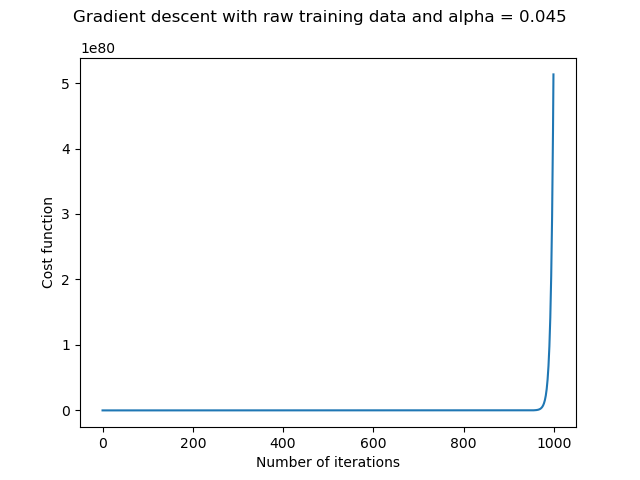

In [12]:
w_optimal_raw, b_optimal_raw, cost_hist_raw = g_desc(x_train, y_train, np.zeros(3), 0, 0.045)

fig3, ax = plt.subplots()
fig3.suptitle('Gradient descent with raw training data and alpha = 0.045')
ax.plot(np.arange(0,1000,1),cost_hist_raw)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost function')
plt.show()

We repeat the same below, but with a lower $\alpha = 0.04$. Now we reach a similar cost function minimum as with the normalized data, but it takes three times the iterations.

Iteration:    0, cost:  6.6177
Iteration:  100, cost:  0.0534
Iteration:  200, cost:  0.0497
Iteration:  300, cost:  0.0495
Iteration:  400, cost:  0.0494
Iteration:  500, cost:  0.0494
Iteration:  600, cost:  0.0493
Iteration:  700, cost:  0.0493
Iteration:  800, cost:  0.0493
Iteration:  900, cost:  0.0493


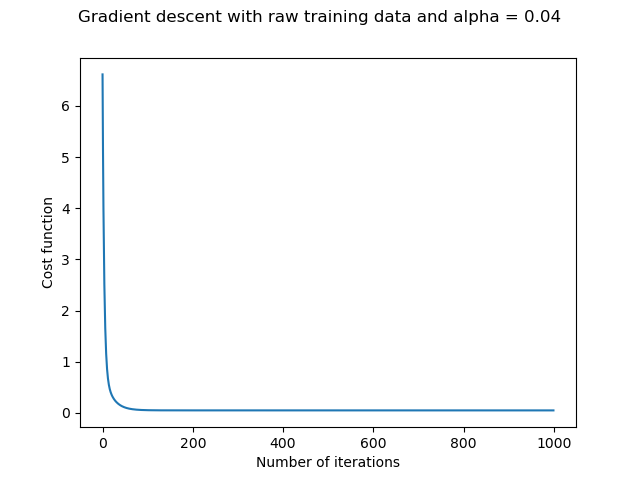

In [13]:
w_optimal_raw2, b_optimal_raw2, cost_hist_raw2 = g_desc(x_train, y_train, np.zeros(3), 0, 0.04)

fig4, ax = plt.subplots()
fig4.suptitle('Gradient descent with raw training data and alpha = 0.04')
ax.plot(np.arange(0,1000,1),cost_hist_raw2)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost function')
plt.show()

<center><h3 style="color:#DC3535">6. Plotting the normalized model's predictions vs true values

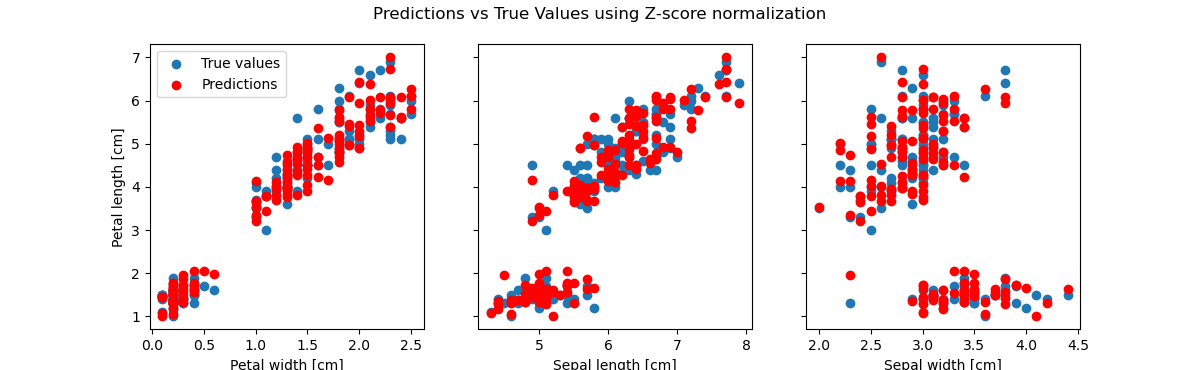

In [14]:
#Predictions vs true values 
y_predicted = np.dot(x_norm, w_optimal) + b_optimal

#Predictions and true values vs raw features    
fig4, ax = plt.subplots(1,3,figsize=(12, 3.7),sharey=True)
for i in range(len(ax)):
    ax[i].set_xlabel(x_features[i])
    #True
    ax[i].scatter(x_train[:,i],y_train, label = 'True values')
    #Predicted
    ax[i].scatter(x_train[:,i], y_predicted, color='red', label = 'Predictions')

ax[0].set_ylabel("Petal length [cm]"); ax[0].legend()
fig4.suptitle("Predictions vs True Values using Z-score normalization")
plt.show()